## GOAL
- Using **networkx** to initialize a network and compute the **degree centrality**, **eigenvector centrality**, **closeness centrality**, **betweenness centrality**

## INITIALIZE

- Use the **Karate Club data** in networkx, **initialize** the network and **draw** it!
- References: https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.generators.social.karate_club_graph.html

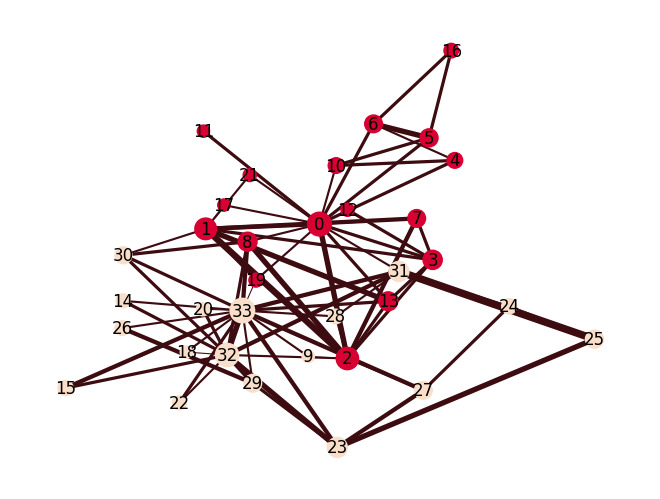

In [1]:
# 导入数据
import networkx as nx
import matplotlib.pyplot as plt
from math import sqrt

G = nx.karate_club_graph()  #这个图的边是有权的  print(G.edges.data())
# 根据所属的俱乐部给node赋予不同的颜色，
node_color = [''] * 34
for node in G.nodes.data():
    if node[1]['club'] == 'Mr. Hi':
        node_color[node[0]] = '#D80032'
    else:
        node_color[node[0]] = '#F9DEC9'
# 
#degree1 = [a[1] for a in nx.degree(G)]
degree2 = [0]*34
for item in G.edges.data('weight'):
    degree2[item[0]] += item[2]
    degree2[item[1]] += item[2]
#diff = [degree1[i] - degree2[i] for i in range(32)]
#print(diff) 

nx.draw(G, with_labels=True, 
        pos=nx.kamada_kawai_layout(G), 
        width=[a[2]/1.3 for a in G.edges.data('weight')],
        edge_color='#3D0C11',
        node_size=[sqrt(x)*45 for x in degree2],
        node_color=node_color)    #度数开方，减少方差，比归一化简单直接些


## 01 Compute degree centrality and draw!

- References: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.degree_centrality.html#networkx.algorithms.centrality.degree_centrality

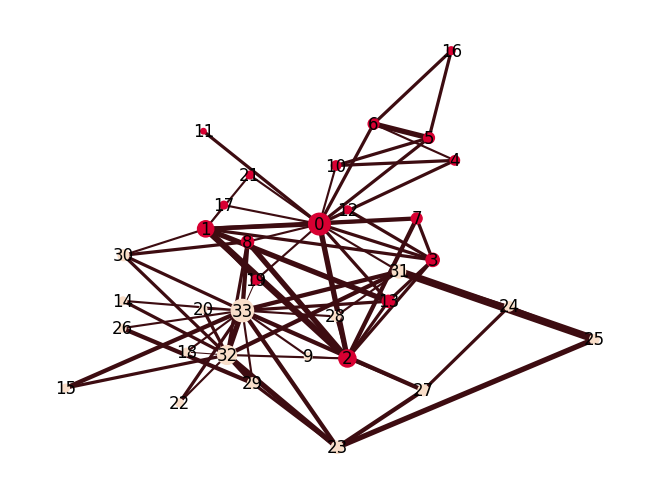

In [2]:
degreeCentra = nx.degree_centrality(G)  # degree/(n-1)，会除以一个图中最大可能的度数以归一化

#print(*[f'node id: {item[0]}, degree centrality: {item[1]: .3f}\n' for item in degreeCentra.items()], sep='')

nx.draw(G, with_labels=True, 
        pos=nx.kamada_kawai_layout(G), 
        width=[a[2]/1.3 for a in G.edges.data('weight')],
        edge_color='#3D0C11',
        node_size=[x[1]*500 for x in degreeCentra.items()],
        node_color=node_color)    #度数开方，减少方差，比归一化简单直接些


## 02 Compute eigenvector centrality and draw!

- References: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.eigenvector_centrality.html#networkx.algorithms.centrality.eigenvector_centrality

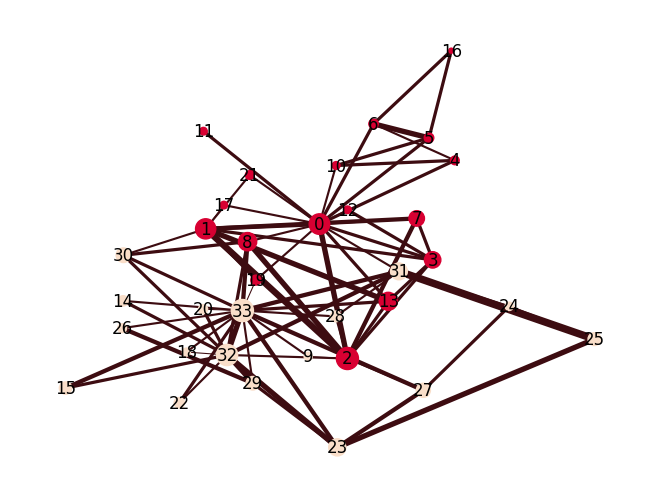

In [3]:
eigenvector = nx.eigenvector_centrality(G, weight='weight')
#print(*[f'node id: {item[0]}, eigenvector centrality: {item[1]: .3f}\n' for item in eigenvector.items()], sep='')
nx.draw(G, with_labels=True, 
        pos=nx.kamada_kawai_layout(G), 
        width=[a[2]/1.3 for a in G.edges.data('weight')],
        edge_color='#3D0C11',
        node_size=[x[1]*700 for x in eigenvector.items()],
        node_color=node_color)    #度数开方，减少方差，比归一化简单直接些


## 03 Compute closeness centrality and draw!

- References: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html#networkx.algorithms.centrality.closeness_centrality

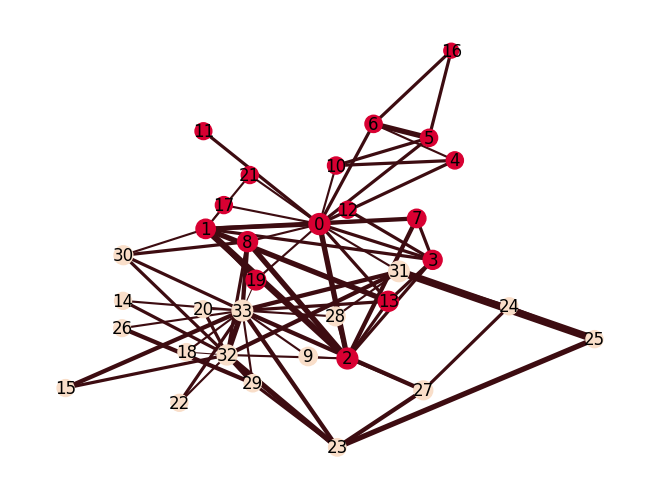

In [4]:
closeness = nx.closeness_centrality(G, wf_improved=True)
#print(*[f'node id: {item[0]}, closeness centrality: {item[1]: .3f}\n' for item in closeness.items()], sep='')
nx.draw(G, with_labels=True, 
        pos=nx.kamada_kawai_layout(G), 
        width=[a[2]/1.3 for a in G.edges.data('weight')],
        edge_color='#3D0C11',
        node_size=[x[1]*400 for x in closeness.items()],
        node_color=node_color)    #度数开方，减少方差，比归一化简单直接些

# 大伙都差不多

## 04 Compute the shortest-path betweenness centrality and draw!

- References: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html#networkx.algorithms.centrality.betweenness_centrality

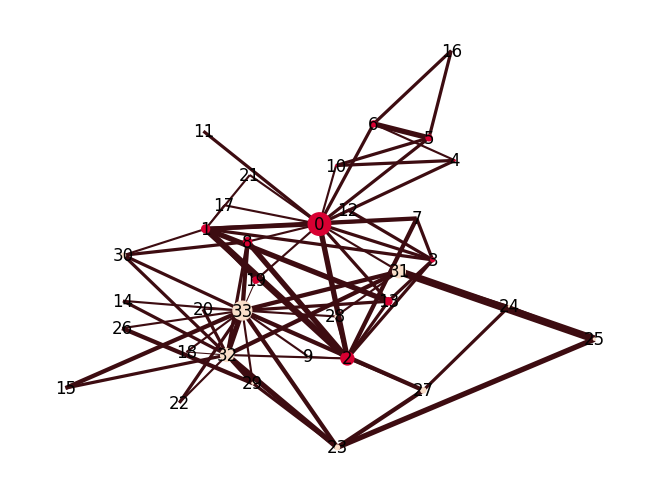

In [5]:
betweenness = nx.betweenness_centrality(G)
#print(*[f'node id: {item[0]}, shortest-path betweenness centrality: {item[1]: .3f}\n' for item in betweenness.items()], sep='')
nx.draw(G, with_labels=True, 
        pos=nx.kamada_kawai_layout(G), 
        width=[a[2]/1.3 for a in G.edges.data('weight')],
        edge_color='#3D0C11',
        node_size=[x[1]*600 for x in betweenness.items()],
        node_color=node_color)    #度数开方，减少方差，比归一化简单直接些


## BONUS: What insights can you extract from the results of looking into the different centrality measures?

Text(0.5, 1.0, 'betweenness centrality')

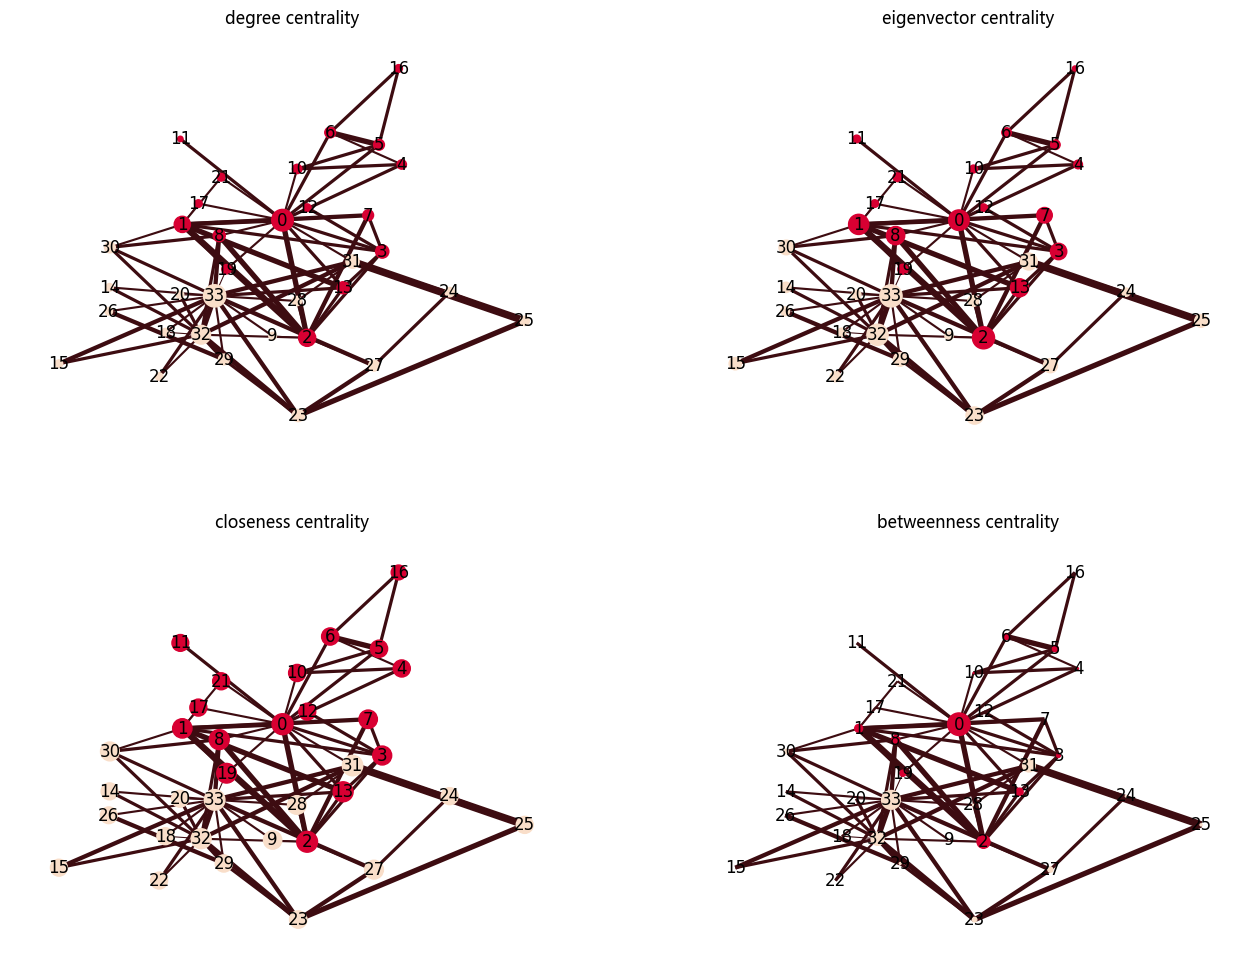

In [6]:
# 绘制四张图
plt.figure(figsize=(16, 12), dpi=100)
plt.rc("font", family='MicroSoft YaHei', weight="bold")

plt.subplot(2, 2, 1)
nx.draw(G, with_labels=True, 
        pos=nx.kamada_kawai_layout(G), 
        width=[a[2]/1.3 for a in G.edges.data('weight')],
        edge_color='#3D0C11',
        node_size=[x[1]*500 for x in degreeCentra.items()],
        node_color=node_color)
plt.title('degree centrality')

plt.subplot(2, 2, 2)
nx.draw(G, with_labels=True, 
        pos=nx.kamada_kawai_layout(G), 
        width=[a[2]/1.3 for a in G.edges.data('weight')],
        edge_color='#3D0C11',
        node_size=[x[1]*700 for x in eigenvector.items()],
        node_color=node_color)
plt.title('eigenvector centrality')

plt.subplot(2, 2, 3)
nx.draw(G, with_labels=True, 
        pos=nx.kamada_kawai_layout(G), 
        width=[a[2]/1.3 for a in G.edges.data('weight')],
        edge_color='#3D0C11',
        node_size=[x[1]*400 for x in closeness.items()],
        node_color=node_color)
plt.title('closeness centrality')

plt.subplot(2, 2, 4)
nx.draw(G, with_labels=True, 
        pos=nx.kamada_kawai_layout(G), 
        width=[a[2]/1.3 for a in G.edges.data('weight')],
        edge_color='#3D0C11',
        node_size=[x[1]*600 for x in betweenness.items()],
        node_color=node_color)
plt.title('betweenness centrality')

In [7]:
# 汇总数据
import pandas as pd
AllData = {'club': dict(G.nodes.data("club")),
          'degree': dict([(i, degree2[i]) for i in range(34)]),
          'degreeCentra': degreeCentra,
          'eigenvectorCentra': eigenvector,
          'closenessCentra': closeness,
          'betweennessCentra': betweenness}
df = pd.DataFrame(AllData)

# 2 描述统计这些指标
stats = {'mean': df.mean(),
         'std': df.std()}
#print(pd.DataFrame(stats))
#                         mean        std
# degree             13.588235  11.845259
# degreeCentra        0.139037   0.117509
# eigenvectorCentra   0.137367   0.104219
# closenessCentra     0.426480   0.072092
# betweennessCentra   0.044006   0.093935

# 3 计算相关矩阵
#print(df.corr(method='pearson')) 
 
#                      degree  degreeCentra  eigenvectorCentra  closenessCentra    betweennessCentra  
# degree             1.000000      0.975870           0.928554         0.759875        0.850789  
# degreeCentra       0.975870      1.000000           0.878329         0.771591        0.914643   
# eigenvectorCentra  0.928554      0.878329           1.000000         0.844907        0.716407    
# closenessCentra    0.759875      0.771591           0.844907         1.000000        0.717945  
# betweennessCentra  0.850789      0.914643           0.716407         0.717945        1.000000  


# 4 二总体t检验
ttest = {}
from scipy.stats import ttest_ind
for col in df.columns:
    if col != 'club':
        t, p = ttest_ind(df[df['club']=='Mr. Hi'][col], df[df['club']=='Officer'][col])
        ttest[col] = {'t': t, 'p': p}
#print(pd.DataFrame(ttest))
#     degree  degreeCentra  eigenvectorCentra  closenessCentra    betweennessCentra
# t  0.171165      0.261581           0.050507         0.458132       0.340533
# p  0.865172      0.795321           0.960033         0.649954       0.735681

         

C:\Users\xxxx\AppData\Local\Temp\ipykernel_45044\4148894036.py:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats = {'mean': df.mean(),
C:\Users\xxxx\AppData\Local\Temp\ipykernel_45044\4148894036.py:13: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  'std': df.std()}


## Insights
### 1 
degree, degree Centrality, eigenvector Centrality, betweenness Centrality之间有较高相关性。从图的直观对比，皮尔森相关系数矩阵和均值方差的对比中均可得知。此外，这些指标共同说明，该网络具有相当的向中心聚集的趋势，有4位核心人物————0 2 32 33号

### 2
closeness Centrality普遍较高，说明这张图中的各人有着良好的连通性，彼此之间连接较多。

### 3
t-test的结果显示，两个俱乐部的成员在网络重要性指标上均没有显著差异。

### 4
两个俱乐部的成员之间联系不多，除了处于交界处的几位成员，剩余的成员之于与自己同俱乐部的人有联系。